# Data Handling
---

We are now equipped with sufficient tools to start really handling data. So far you have received data that didn't require much cleaning and processing. Unfortunately, in real life, data is messy and this is something you will experience firsthand on your project.

Typically, data cleaning and processing is one of the most time-consuming parts of any data science project and it can be the difference between delivering on time or missing a deadline.

## Obtaining and storing data locally
---

In class, we are going to use pre-construted CSV files in order to save time. However, it is important that you learn how to find and download data yourself as it will be required for your project. 

In what follows, you will find a description on how to download the data from an online source: **the data portal of the Swiss National Bank (SNB)**. We highly recommend you go over this description and test out the steps for yourself.

### Instructions to obtain the data
1. Go to the data portal of the Swiss National Bank, directly to the page with foreign exchange rates: https://data.snb.ch/en/search?q=%23fxrates.
2. Choose the item **Foreign exchange rates - Month**.
4. Scroll down and choose (**Monthly average**) from January 2001 to most recent, in CSV format (choose **CSV (selection)**, <span style="color:red">**not CSV (all)!**</span>).

Accessing the data on Oct 15, 2024, we obtain a file named `snb-data-devkum-en-selection-20241001_1430.csv`. You find it in the data folder on Nuvolos.

___
⚠️ <span style="color:red">**BE CAREFUL WHEN OPENING  CSV FILES in Excel!**</span> ⚠️

Depending on country settings of your device, Excel may change formats automatically, which will make it difficult to import that data into Python. The easiest way to inspect the data is to go to the data folder in Jupyter Lab's file browser (left pane) and double-click on the CSV file. Alternatively, you can download the file and open it with a text editor (e.g., Notepad, TextEdit, VSCode, &hellip;).

### Path, directories, and data import
---

Do you remember how we imported the **iris** dataset in previous classes? We used

```python
iris = pd.read_csv("data/iris.csv")
```
when in Jupyter Lab, or 
```python
iris = pd.read_csv("../data/iris.csv")
```
when in VSCode.

The difference between the two comes from the fact that in Jupyter Lab, the Python instance is started in the *home* directory, which is the outermost directory of our Nuvolos classroom. In VSCode, the Python instance is started directly in the same folder as the notebook. In other words, we have the following scheme:

```
/home (<- Python in Jupyter Lab is instantiated in this folder)
∟ /data
  ∟ iris.csv
∟ /notebooks (<- Python in VSCode is instantiated in this folder)
  ∟ 01_numpy-basics.ipynb
  ∟ 02_pandas-basics.ipynb
  ∟ ...;
∟ /homework
  ∟ ...;
∟ /solutions
```

Thus, when in Jupyter Lab, the path `data/iris.csv` is telling us to look for a folder called `data` that is in the same folder as our current location and then find a file called `iris.csv` inside that folder. Conversely, when in VSCode, the path `../data/iris.csv` is telling us to first go back one level (to the `home` folder) and then look for a folder called `data` and then find a file called `iris.csv` inside that folder.

Oftentimes, you might want to refer to a file that is somewhere on your computer, not necessarily always in the same folder (or a sub-folder in this case). Perhaps, if you are working on Windows, you have the two following folders (I hope you don't! This is a *bad* example):
+ `C:/notebooks/mynotebook.ipynb`
+ `C:/data/iris.csv`

#### Absolute paths
The above method simply passes the *absolute path*, i.e., the path *starting from the base of the directories on your operating system*, e.g.

```python
pd.read_csv("C:/data/iris.csv")
```
This works fine, but if your folder structure is complicated this might be cumbersome.

#### Relative paths
Another way to do it is using relative paths, i.e., relative to *where we are currently*. This is implicitly what we did when loading the iris dataset, we use a path, relative to the Python instance we were working with. In a case as the one portrayed above for VSCode, we need to know how to *go back one folder* using relative path notation, this is done by adding `..`, e.g.,

```python
pd.read_csv("../data/iris.csv")
```

For a more complicated example, consider that your are working in VSCode with a notebook and a dataset situated as follow:  
+ `C:/HSG/HS2024/DSF/my-project/notebooks/stock_market_prediction.ipynb`
+ `C:/HSG/HS2024/DSF/data/datasets/stock_market_data.csv`

Can you figure out what you need to type to read the CSV using relative paths?

The answer is
```python
pd.read_csv("../../data/datasets/stock_market_data.csv")
```
Do you see why? The first `..` takes us one folder back, i.e. into `my-project`, but the `data` folder is not in here! So we need another `..` to go back one more folder.

This might all see a bit abstract and complicated. In my opinion, it's best to have your files all together in your project folder. A bit like how the folder for this class is structured! For instance, in my research, I try to have a main folder, e.g., `my-project` and inside, I will have a `data` folder, a `code` folder, and something like a `latex` folder where I keep my writings on the subject.

#### ⚠️ Backward and forward slashes

Sometimes, you might see a path written as  
+ `..\\data\\iris.csv`

This is some Windows-specific notation. **This is bad practice**, for two main reasons:  
+ It only works with windows. If somebody working on a unix system (Mac, Linux) tries to run your code it will fail.
+ Backslash is a special character for strings called an *escape character*. This is a bit advanced, but for instance `\n` is a newline, `\t` is a tab, etc.
+ It's one more character than you need.

So, to summarize, just use forward slashes. They work on all systems and use less characters. 

**⛔ There is never a good reason to use `\\` instead of `/` when indicating a path! ⛔**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
pd.read_csv("data/snb-data-devkum-en-selection-20241001_1430.csv")

,"CubeId;""devkum"""
0,"PublishingDate;""2024-10-01 14:30"""
1,"Date;""D0"";""D1"";""Value"""
2,"2001-01;""M0"";""EUR1"";""1.5291"""
3,"2001-01;""M0"";""GBP1"";""2.407"""
4,"2001-01;""M0"";""DKK100"";""20.481"""
...,...
7977,"2024-09;""M0"";""SGD1"";""0.65357"""
7978,"2024-09;""M0"";""THB100"";""2.54235"""
7979,"2024-09;""M0"";""XDR1"";""1.14415"""
7980,"2024-09;""M0"";""USD3M"";""0.8384"""


As we can see from the output of the code above, reading the CSV into dataframe format with `pandas` produces a strange result. Have we done something wrong?

Well, not exactly, but as mentioned above, the data you download does not always come in a clean format and sometimes you will need to inspect the data yourself to understand what needs to be done before you can import it properly.

Looking either at the output above, or at the file directly by double-clicking on it in the explorer, we observe a few things:
+ The 2 first rows are separated from the rest by a blank row. Also, these rows are *different*. In fact, they have only 2 elements separated by `;`, whereas the later rows always have 4.
+ The values are separated by a semi-colon (`;`) instead of a comma(`,`). As it turns out, the elements in a CSV file are not always separated by a comma, the separator can be something else (often a semi-colon, but sometimes it can also be something else, this is something you will have to find out). In particular, the Swiss standard for CSV differs from the more widely spread American one. The semi-colon is the typical separator for CSV files with Swiss format!

Taking those two observations into consideration, we can try to import our CSV from the row 4 onwards, using a semi-colon separator. Can you figure out how to do it yourself?

#### ➡️ ✏️ Task 1

In the cell below, read in the SNB data by passing options to deal with the issues noted above.

*Hint:* Having a look at the [`pandas` documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) is always helpful to understand what options we can pass to a specific function. In particular, you want to look at the arguments `skiprows` and `sep`.

In [3]:
# ➡️ ✏️ Your code here


In [4]:
# Solution
snb = pd.read_csv("data/snb-data-devkum-en-selection-20241001_1430.csv", skiprows=2, sep=";")
snb

,Date,D0,D1,Value
0,2001-01,M0,EUR1,1.52910
1,2001-01,M0,GBP1,2.40700
2,2001-01,M0,DKK100,20.48100
3,2001-01,M0,NOK100,18.57050
4,2001-01,M0,CZK100,4.35130
...,...,...,...,...
7975,2024-09,M0,SGD1,0.65357
7976,2024-09,M0,THB100,2.54235
7977,2024-09,M0,XDR1,1.14415
7978,2024-09,M0,USD3M,0.83840


The clean dataframe consists of 4 columns: `Date`, `D0`, `D1`, and `Value`. The names `D0` and `D1` are not very expressive, it would be better to rename those columns. In any case, let's start with some data pre-processing, **as always**.

In [5]:
# Display the unique 'Date' values
snb["Date"].unique()

array(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
       '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
       '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
       '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
       '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
       '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', 

In [6]:
# Transform the date column to date format
snb["Date"] = pd.to_datetime(snb["Date"], format="%Y-%m")
snb["Date"]

0      2001-01-01
1      2001-01-01
2      2001-01-01
3      2001-01-01
4      2001-01-01
          ...    
7975   2024-09-01
7976   2024-09-01
7977   2024-09-01
7978   2024-09-01
7979   2024-09-01
Name: Date, Length: 7980, dtype: datetime64[ns]

In [7]:
# Display the unique 'D0' values
snb["D0"].unique()

array(['M0'], dtype=object)

The `D0` column in our dataframe only consists of the value `M0`. This is not very useful information, thus we might as well drop this column.

#### ➡️ ✏️ Your turn
In the cell below, remove the column `D0` from the `snb` dataframe.

In [8]:
# ➡️ ✏️ Your code here


In [9]:
# Solution
snb.drop(columns=["D0"], inplace=True)

In [10]:
# Display the unique values in D1
snb["D1"].unique()

array(['EUR1', 'GBP1', 'DKK100', 'NOK100', 'CZK100', 'HUF100', 'PLN100',
       'RUB1', 'SEK100', 'TRY100', 'USD1', 'CAD1', 'ARS1', 'BRL100',
       'MXN100', 'ZAR1', 'JPY100', 'AUD1', 'CNY100', 'HKD100', 'KRW100',
       'MYR100', 'NZD1', 'SGD1', 'THB100', 'XDR1', 'USD3M', 'USD6M'],
      dtype=object)

As we can see, the column `D1` contains the different currencies (28 in total). Because the name `D1` is not very helpful, we rename the column.

In [11]:
# Rename the column 'D1' to 'Currency'
snb.rename(columns={"D1": "Currency"}, inplace=True)

In [12]:
snb # Display the cleaned data

,Date,Currency,Value
0,2001-01-01,EUR1,1.52910
1,2001-01-01,GBP1,2.40700
2,2001-01-01,DKK100,20.48100
3,2001-01-01,NOK100,18.57050
4,2001-01-01,CZK100,4.35130
...,...,...,...
7975,2024-09-01,SGD1,0.65357
7976,2024-09-01,THB100,2.54235
7977,2024-09-01,XDR1,1.14415
7978,2024-09-01,USD3M,0.83840


Let us plot the data to see how the exchange rate of the Euro and the US Dollar evolve over time. Notice how matplotlib instantly recognizes the date format and plots the data accordingly.

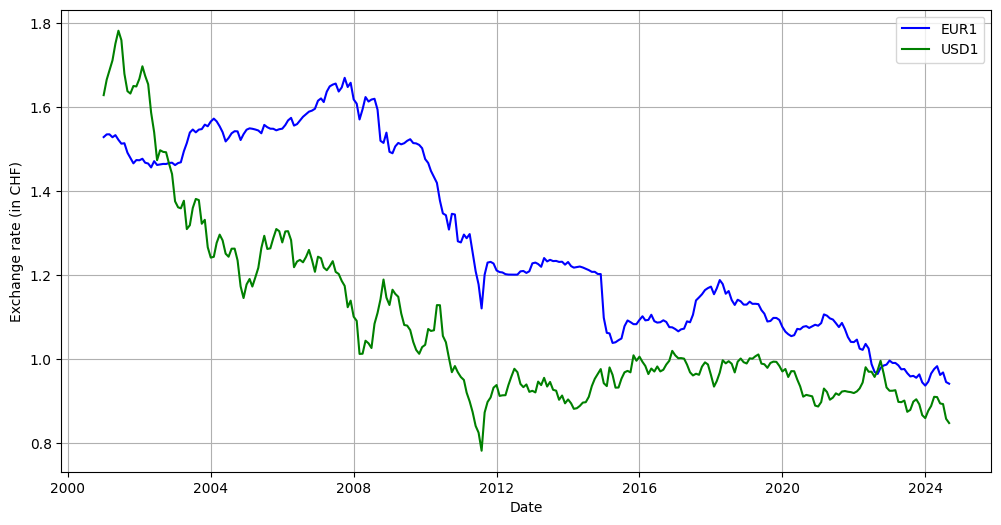

In [13]:
color_dict = {"EUR1": "blue", "USD1": "green"} # Create a color mapping

fig, ax = plt.subplots(figsize=(12, 6)) # Instantiate the figure and axis
# Iterate over the keys of the color dictionary (EUR1, USD1)
for currency in color_dict.keys():
    subset = snb.loc[snb["Currency"] == currency, :] # Subset the data
    ax.plot(subset["Date"], subset["Value"], label = currency, color = color_dict[currency])
ax.legend() # Add legend
# Set x- and y-labels
ax.set_xlabel("Date")
ax.set_ylabel("Exchange rate (in CHF)")
ax.grid(True) # Add a grid in the basckground

## Long and Wide Data Formats
___
For the second part of this notebook, we will talk a little about data formats, in particular the **long** and **wide** formats. While those are not the only formats that exist, they are, without doubt, the most prevalent ones.

Most of the time, you will receive data in a *tabular* format (e.g., like an Excel spreadsheet, with rows and columns), where the data is either in long or wide format. It's important that you are comfortable with both formats and that you are able to transform a dataframe from one format to the other.

In our experience, with `pandas`, you will be using **wide format** most of the time. However, when obtaining data from external sources, you will often be faced with data in **long format** as well, hence, it's good to know both. Personally, we also feel like wide format is generally more intuitive, but others might have different views.

You might not know it yet, but you have already encountered both data in wide and long format. In fact, the *iris* dataset is in wide format, while the *exchange rate* data is in long format.

Let's start with a quick example. Say we have a dataset of the students taking a specific course. This dataset has the following information for each student:  
+ The name
+ The grade point average (GPA)
+ The track (Econ, Business, Law, CS)
+ The current semester

### Wide format
If the dataset is in wide format, it will look something like this.

|Name|GPA|Track|Semester|
|:--|--:|:--|--:|
|Johann Friedrich|6.0|Econ|3|
|Florence|5.5|Business|4|
|Gertrude|4.5|Econ|3|
|Ronald|4.0|Law|3|
|Janet|5.0|Econ|5|
|Leonhard|6.0|CS|5|
|Sofya|5.5|Law|3|
|...|...|...|...|

### Long format
If, on the other hand, we had received the data in long format, it would look as follows:

|Name|Variable|Value|
|:--|:--|--:|
|Johann Friedrich|GPA|6.0|
|Johann Friedrich|Track|Econ|
|Johann Friedrich|Semester|3|
|Florence|GPA|5.5|
|Florence|Track|Business|
|Florence|Semester|4|
|Gertrude|GPA|4.5|
|Gertrude|Track|Econ|
|Gertrude|Semester|3|
|Ronald|GPA|4.0|
|Ronald|Track|Law|
|Ronald|Semester|3|
|...|...|...|

The names *long* and *wide* are fairly intuitive now that we see an example. 

The same data in **long format** generaly is *longer*, i.e., it has more rows, because instead of having a single row per observation, we have a row for each variable, for each individual. On the other hand, the **wide format** is, as the name suggests, *wider*, i.e., it has more columns, because now we group all information on an observation on a single row and just add more columns.



### From long to wide

Time to get our hands dirty. Let's look at how to reshape data from the long format to the wide format. Recall that our SNB exchange rate data is in long format.

In [14]:
# Create a smaller dataset with only two currencies: EUR1 and USD1
snb_small = snb.loc[snb["Currency"].isin(["EUR1", "USD1"])]
snb_small # Display the data

,Date,Currency,Value
0,2001-01-01,EUR1,1.52910
10,2001-01-01,USD1,1.62910
28,2001-02-01,EUR1,1.53550
38,2001-02-01,USD1,1.66610
56,2001-03-01,EUR1,1.53570
...,...,...,...
7906,2024-07-01,USD1,0.89244
7924,2024-08-01,EUR1,0.94494
7934,2024-08-01,USD1,0.85732
7952,2024-09-01,EUR1,0.94101


Notice how this data is in long format? Let's go ahead and transform the *two currencies* version of the data into wide format.

In [15]:
# Transform the smaller dataset to wide format
snb_small_wide = snb_small.pivot(
    index="Date", columns="Currency", values="Value"
).reset_index().rename_axis(None, axis=1)
# Display the wide data
snb_small_wide

,Date,EUR1,USD1
0,2001-01-01,1.52910,1.62910
1,2001-02-01,1.53550,1.66610
2,2001-03-01,1.53570,1.68780
3,2001-04-01,1.52870,1.71200
4,2001-05-01,1.53370,1.75190
...,...,...,...
280,2024-05-01,0.98280,0.90912
281,2024-06-01,0.96190,0.89391
282,2024-07-01,0.96782,0.89244
283,2024-08-01,0.94494,0.85732


Do you see how going from long to wide, our dataset is now half as long but has twice as many *value* columns? This is because we did the exercise with two currencies, as you can see from the example below, this also works for much more than only two identifiers (currencies in this case).

In [16]:
# Transform the full dataset to wide format
snb_wide = snb.pivot(
    index="Date", columns="Currency", values="Value"
).reset_index().rename_axis(None, axis=1)

snb_wide

,Date,ARS1,AUD1,BRL100,CAD1,CNY100,CZK100,DKK100,EUR1,GBP1,...,RUB1,SEK100,SGD1,THB100,TRY100,USD1,USD3M,USD6M,XDR1,ZAR1
0,2001-01-01,162.95380,0.90379,83.23810,1.08360,19.67530,4.35130,20.48100,1.52910,2.40700,...,0.05730,17.17670,0.93730,3.77710,0.00024,1.62910,NaN,NaN,2.12170,0.20900
1,2001-02-01,166.63550,0.89020,83.10500,1.09490,20.15145,4.43060,20.56700,1.53550,2.42200,...,0.05820,17.10450,0.95550,3.90480,0.00022,1.66610,NaN,NaN,2.15610,0.21320
2,2001-03-01,168.80820,0.85048,80.84090,1.08440,20.43436,4.43880,20.56730,1.53570,2.43950,...,0.05880,16.81230,0.95250,3.84120,0.00017,1.68780,NaN,NaN,2.16061,0.21390
3,2001-04-01,171.27370,0.85564,77.98950,1.09770,20.69019,4.42300,20.47740,1.52870,2.45630,...,0.05920,16.77370,0.94450,3.76190,0.00014,1.71200,NaN,NaN,2.17255,0.21170
4,2001-05-01,175.24760,0.91208,76.57620,1.13660,21.17961,4.45960,20.55100,1.53370,2.49750,...,0.06030,16.92520,0.96550,3.84950,0.00015,1.75190,NaN,NaN,2.21202,0.21970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2024-05-01,0.00103,0.60223,17.68740,0.66500,12.56685,3.95960,13.17365,0.98280,1.14898,...,0.01002,8.45885,0.67294,2.48133,2.81851,0.90912,0.9001,0.8908,1.20179,0.04935
281,2024-06-01,0.00099,0.59373,16.62053,0.65205,12.32098,3.88326,12.89532,0.96190,1.13646,...,0.01019,8.52495,0.66122,2.43506,2.74282,0.89391,0.8843,0.8751,1.17900,0.04857
282,2024-07-01,0.00097,0.59562,16.10825,0.65102,12.28777,3.82691,12.97271,0.96782,1.14718,...,0.01021,8.39229,0.66276,2.46096,2.71117,0.89244,0.8827,0.8732,1.18021,0.04894
283,2024-08-01,0.00091,0.57081,15.44905,0.62763,11.99358,3.75497,12.66426,0.94494,1.10943,...,0.00958,8.25208,0.65198,2.46884,2.54181,0.85732,0.8488,0.8404,1.15054,0.04754


### From wide to long

Going from long to wide was easy, a simple `.pivot` method and a `.reset_index()` following did the trick. Is going from wide to long just as easy?

In [17]:
np.random.seed(72) # Set the random seed for the sample to always be the same
# This time let's use a random sample of 10 flowers from iris dataset since it's already in wide format
iris = pd.read_csv("data/iris.csv").sample(n=10)
iris # Display the dataset

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,setosa,5.0,3.3,1.4,0.2
88,virginica,7.2,3.0,5.8,1.6
125,versicolor,6.6,3.0,4.4,1.4
116,versicolor,5.6,3.0,4.5,1.5
141,versicolor,6.1,3.0,4.6,1.4
79,virginica,6.7,3.1,5.6,2.4
89,virginica,6.5,3.0,5.8,2.2
144,versicolor,5.6,2.7,4.2,1.3
4,setosa,4.3,3.0,1.1,0.1
11,setosa,5.0,3.5,1.3,0.3


In [18]:
# Going wide to long is also called "melting"
iris_long = pd.melt(iris.reset_index(), id_vars="index", value_vars=iris.columns)
iris_long # Display the data

,index,variable,value
0,20,species,setosa
1,88,species,virginica
2,125,species,versicolor
3,116,species,versicolor
4,141,species,versicolor
5,79,species,virginica
6,89,species,virginica
7,144,species,versicolor
8,4,species,setosa
9,11,species,setosa


### Getting used to it

Unfortunately, both the exchange rate and the iris datasets are not the best examples to do long and wide format changes. Do you see why?

Think of our first example with the students, there it's pretty clear that our identifier is the name of the student, and each student has multiple variables that have different values.

Try to think of this for our iris data. What is the identifier? There is no proper identifier, that's why we had to use `.reset_index()`, such that we add an `index` column which contains the numbering of each observation, creating a fake identifier in a sense.

Perhaps that went a bit fast. Look at what `.reset_index()` does in isolation.

In [19]:
# Adds a column named "index" with the value of the index
iris.reset_index()

,index,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,20,setosa,5.0,3.3,1.4,0.2
1,88,virginica,7.2,3.0,5.8,1.6
2,125,versicolor,6.6,3.0,4.4,1.4
3,116,versicolor,5.6,3.0,4.5,1.5
4,141,versicolor,6.1,3.0,4.6,1.4
5,79,virginica,6.7,3.1,5.6,2.4
6,89,virginica,6.5,3.0,5.8,2.2
7,144,versicolor,5.6,2.7,4.2,1.3
8,4,setosa,4.3,3.0,1.1,0.1
9,11,setosa,5.0,3.5,1.3,0.3


So that's why we couldn't just use
```python
iris_long = pd.melt(iris, value_vars=iris.columns)
```
above. There is no way to identify what each row belongs to, as you can see from the example below.

In [20]:
# 🙀 🤯 how can we find out which row belongs to which observation in the wide format?
pd.melt(iris, value_vars=iris.columns)

,variable,value
0,species,setosa
1,species,virginica
2,species,versicolor
3,species,versicolor
4,species,versicolor
5,species,virginica
6,species,virginica
7,species,versicolor
8,species,setosa
9,species,setosa


It's a bit similar with the exchange rate data, however, it's easier to use the date as an identifier, it seems more intuitive. But  the student dataset really helps illustrate this whole procedure better.

In [21]:
# Load dataframe (wide format)
students_wide = pd.read_csv("data/students_wide.csv")
students_wide # Display the data

,student,gpa,track,semester
0,Johann Friedrich,6.0,Econ,3
1,Florence,5.5,Business,4
2,Gertrude,4.5,Econ,3
3,Ronald,4.0,Law,3
4,Janet,5.0,Econ,5
5,Leonhard,6.0,CS,5
6,Sofya,5.5,Law,3


In [22]:
# Load a dataframe (long format)
students_long = pd.read_csv("data/students_long.csv")
students_long # Display the data

,student,variable,value
0,Johann Friedrich,gpa,6.0
1,Florence,gpa,5.5
2,Gertrude,gpa,4.5
3,Ronald,gpa,4.0
4,Janet,gpa,5.0
5,Leonhard,gpa,6.0
6,Sofya,gpa,5.5
7,Johann Friedrich,track,Econ
8,Florence,track,Business
9,Gertrude,track,Econ


#### ➡️ ✏️ Your turn: Wide to long

Using the `students_wide` dataframe, create a long format dataframe, where `student` is the id variable and `gpa`, `track`, and `semester` are the three value variables.

*Hint*: Use the code above to help yourself. Your output should be the same as what is currently in  `students_long`

In [23]:
# ➡️ ✏️ Your code here


In [24]:
# Solution
students_long = pd.melt(students_wide, id_vars="student", value_vars=["gpa", "track", "semester"])
students_long.sort_values(by="student")

,student,variable,value
1,Florence,gpa,5.5
8,Florence,track,Business
15,Florence,semester,4
2,Gertrude,gpa,4.5
9,Gertrude,track,Econ
16,Gertrude,semester,3
18,Janet,semester,5
4,Janet,gpa,5.0
11,Janet,track,Econ
0,Johann Friedrich,gpa,6.0


#### ➡️ ✏️ Your turn: Long to wide

Using the `students_long` dataframe, create a wide format dataframe, where `student` is the id variable and `gpa` and `track` are the two value variables.

*Hint*: Use the code above to help yourself. Your output should be the same as what is currently in  `students_wide`

In [25]:
# ➡️ ✏️ Your code here


In [26]:
# Solution
students_wide = students_long.pivot(
    index="student", columns="variable", values="value"
).reset_index()
students_wide

variable,student,gpa,semester,track
0,Florence,5.5,4,Business
1,Gertrude,4.5,3,Econ
2,Janet,5.0,5,Econ
3,Johann Friedrich,6.0,3,Econ
4,Leonhard,6.0,5,CS
5,Ronald,4.0,3,Law
6,Sofya,5.5,3,Law


___
#### 🤔 Pause and ponder
Can you think of a use case where wide data is more useful than long data? What about a case where long data is more useful than wide data?
___

## Joining and Merging Datasets
___

Lastly, we will cover how to join and merge datasets together. While you will not use *joining* and *merging* a lot in the notebooks we view in class, because the data we provide you with is relatively clean, it is likely to be amongst the tools you use the most *in the wild*, i.e., when doing your own research or working as a data scientist somewhere. ⚠️ **You will definitely use it a lot in your projects!** ⚠️

Ofentimes, data comes from multiple sources and is scattered among multiple individual files. You need to be able to combine those files and sources into one big dataset which you can use for your analysis.

#### ➡️ ✏️ Your turn

Read in the two following datasets:
+ The exchange rate information from **data/snb-xrates-wide.csv** into a dataframe called `snb_xr`
+ The trades information from **data/snb-trades-wide.csv** into a dataframe called `snb_t`

Inspect the datasets using the `.head()` method.

In [27]:
# ➡️ ✏️ Your code here


In [28]:
# Solution
snb_xr = pd.read_csv("data/snb-xrates-wide.csv")
snb_t = pd.read_csv("data/snb-trades-wide.csv")

In [29]:
# Inspect exchange rates
snb_xr.head(5)

,Date,ARS1,AUD1,BRL100,CAD1,CNY100,CZK100,DKK100,EUR1,GBP1,...,RUB1,SEK100,SGD1,THB100,TRY100,USD1,USD3M,USD6M,XDR1,ZAR1
0,2001-01-01,162.9538,0.90379,83.2381,1.0836,19.67530,4.3513,20.4810,1.5291,2.4070,...,0.0573,17.1767,0.9373,3.7771,0.00024,1.6291,NaN,NaN,2.12170,0.2090
1,2001-02-01,166.6355,0.89020,83.1050,1.0949,20.15145,4.4306,20.5670,1.5355,2.4220,...,0.0582,17.1045,0.9555,3.9048,0.00022,1.6661,NaN,NaN,2.15610,0.2132
2,2001-03-01,168.8082,0.85048,80.8409,1.0844,20.43436,4.4388,20.5673,1.5357,2.4395,...,0.0588,16.8123,0.9525,3.8412,0.00017,1.6878,NaN,NaN,2.16061,0.2139
3,2001-04-01,171.2737,0.85564,77.9895,1.0977,20.69019,4.4230,20.4774,1.5287,2.4563,...,0.0592,16.7737,0.9445,3.7619,0.00014,1.7120,NaN,NaN,2.17255,0.2117
4,2001-05-01,175.2476,0.91208,76.5762,1.1366,21.17961,4.4596,20.5510,1.5337,2.4975,...,0.0603,16.9252,0.9655,3.8495,0.00015,1.7519,NaN,NaN,2.21202,0.2197


In [30]:
# Inspect trades
snb_t.head(5)

,Date,E_GT_WMF,E_GT_N,E_GT_R,E_CHEM_WMF,E_CHEM_N,E_CHEM_R,E_ME_WMF,E_ME_N,E_ME_R,...,A_MET_WMF,A_MET_N,A_MET_R,A_FZ_WMF,A_FZ_N,A_FZ_R,A_TBS_WMF,A_TBS_N,A_TBS_R,H_GT_WMF
0,1997-01-01,8871.638940,NaN,NaN,1358.074369,NaN,NaN,1831.449089,NaN,NaN,...,698.683666,NaN,NaN,166.081698,NaN,NaN,326.344186,NaN,NaN,-693.400919
1,1997-02-01,8460.801745,NaN,NaN,1284.071441,NaN,NaN,1881.731506,NaN,NaN,...,750.572764,NaN,NaN,252.962318,NaN,NaN,329.659427,NaN,NaN,-227.273379
2,1997-03-01,8409.168775,NaN,NaN,1382.926370,NaN,NaN,1873.089217,NaN,NaN,...,728.417233,NaN,NaN,209.434340,NaN,NaN,329.117950,NaN,NaN,35.394580
3,1997-04-01,8668.686941,NaN,NaN,1449.905104,NaN,NaN,1920.156135,NaN,NaN,...,746.091239,NaN,NaN,196.559885,NaN,NaN,324.285474,NaN,NaN,-258.198393
4,1997-05-01,8277.245123,NaN,NaN,1365.644645,NaN,NaN,1865.979142,NaN,NaN,...,734.760934,NaN,NaN,211.277607,NaN,NaN,329.393574,NaN,NaN,-83.757038


___
## Merging data
As can be taken from the official documentation, [joining and merging is a complex topic](https://pandas.pydata.org/docs/user_guide/merging.html), depending on what you are aiming to do, you need to use different specifications.

In particular, we see that the `snb_t` dataframe has dates going back to 1997, while the `snb_xr` only has dates going back to 2001. If we try to combine these two dataframes, we must make a judgment call on how to handle the years which are covered by one dataset and not the other, i.e., what do we do with our data between 1997 and 2001?

Furthermore, we need a column that is present in both dataframes, this is called the **key**. In our case, it's an easy choice, it's clear that the key is the date, i.e., when joining both dataframes, we will end up with a dataframe that still has only one date, but now has all the columns of both dataframes. It's also easy because our key has the same name in both dataframes, but if you look at the documentation, you will see that we can also deal with keys that have different names (as long as the contents are the same!)

The way `pandas` provide merging/joining is through the function

```python
pd.merge(left_df, right_df, how="inner")
```

Basically, this function takes two dataframes, a *left* one, and a *right* one (this is standard nomenclature and comes from database joins, e.g., using SQL). The `how` keyword then governs *how* the data is merge. Here is a short overview of the four most important merges you will see:

|`how`|Effect|
|--:|:--|
|`left`|The key in `left_df` is the one that governs the merge. At the end, your merged dataframe will have **exactly** the same keys as the `left_df`, if `right_df` has some key values which are not present in `left_df`, those rows will be dropped.|
|`right`|The exact same thing as above, but with the roles of `left_df` and `right_df` inversed.|
|`inner`|The keys in the final dataframe are the keys which are present **in both dataframes**, i.e., we drop every observation that has only a key in either `left_df` or `right_df` but not in both!|
|`outer`|This time we keep all the keys, as long as they appear somewhere, we will keep them in our final dataframe.|

This might all sound a bit abstract, so let's start with a very simple toy example and we'll go back to our SNB data at the end of the notebook.

In [31]:
# Load a first dataframe
students_gpa = pd.read_csv("data/students_gpa.csv")
students_gpa # Show the data

,student,gpa
0,Florence,5.5
1,Gertrude,4.5
2,Leonhard,6.0
3,Ronald,4.0


In [32]:
# Load a second dataframe
students_track = pd.read_csv("data/students_track.csv")
students_track # Show the data

,student,track
0,Gertrude,Econ
1,Janet,Econ
2,Johann Friedrich,Econ
3,Leonhard,CS
4,Ronald,Law


So we have 4 students for which we have the GPA, and 5 for which we have the track, but we only have an overlap of 3 students amongst both dataframes. This is something very typical of what you will encounter in your work and research.

In [33]:
# Left join with GPA as left dataframe
pd.merge(students_gpa, students_track, how="left")

,student,gpa,track
0,Florence,5.5,NaN
1,Gertrude,4.5,Econ
2,Leonhard,6.0,CS
3,Ronald,4.0,Law


See what happens? Our dataframe has the exact same **key** (students) as the left dataframe because we used a **left** join. For all students for which we don't have an observation in the `students_track` dataframe, the value is simply a `NaN`, i.e., *not a number*, an indication of a missing value!

Note that we didn't specify the key, but because the dataframes had a column with the same name (`student`), these was used as a key! We could have specified the key also, see below.

In [34]:
# Right join with student as right dataframe
pd.merge(students_gpa, students_track, how="right", on="student")

,student,gpa,track
0,Gertrude,4.5,Econ
1,Janet,NaN,Econ
2,Johann Friedrich,NaN,Econ
3,Leonhard,6.0,CS
4,Ronald,4.0,Law


This is similar but now we have all `track` values filled, because we used the `students_track` dataframe as the *base* for our merge (the *right* dataframe in a *right* merge!)

Note that, as in life, *left* and *right* are relative concepts. We can achieve the exact same result as above using a left join with the left dataframe being `students_track`!

In [35]:
# Exact same result but with a left join, this time changing the left and right dataframe!
pd.merge(students_track, students_gpa, how="left", on="student")

,student,track,gpa
0,Gertrude,Econ,4.5
1,Janet,Econ,NaN
2,Johann Friedrich,Econ,NaN
3,Leonhard,CS,6.0
4,Ronald,Law,4.0


Okay, all that is left is to have a look at **inner** and **outer** join. Do you already understand what they are supposed to do? Notice that the left and right dataframe does not matter in the context of inner and outer joins!

In [36]:
# First an inner join
pd.merge(students_gpa, students_track, how="inner")

,student,gpa,track
0,Gertrude,4.5,Econ
1,Leonhard,6.0,CS
2,Ronald,4.0,Law


An *inner* join only keeps observations that are present in **both** dataframes! There are only two of them. The nice thing is that our final data is clean, i.e., we have no `NaN`, because we discarded all those observations that would have resulted in missing information!

In [37]:
# And lastly, an outer join
pd.merge(students_gpa, students_track, how="outer")

,student,gpa,track
0,Florence,5.5,NaN
1,Gertrude,4.5,Econ
2,Janet,NaN,Econ
3,Johann Friedrich,NaN,Econ
4,Leonhard,6.0,CS
5,Ronald,4.0,Law


And now, using an *outer* join, we keep **everything**, it doesn't matter if they are only present in one dataframe! We end up with a dataframe with many `NaN` but it also has a lot of observations.

___
#### 🤔 Pause and ponder
Is there a join which is better than the others? Can you think of a scenario where you prefer a left/right join? What about an inner join or an outer join?
___

#### ➡️ ✏️ Your turn
Alright, enough reading. Let's get our hands dirty and play around with joins involving real data.


1. Task 1: For each SNB dataset read in, create a `_small` version:  
  + `snb_xr_small` should contain only three columns: `Date`, `EUR1`, and `USD1`
  + `snb_t_small` should contain only three columns: `Date`, `A_GT_WMF`, and `E_GT_WMF`
2. Task 2: Perform a **left** join, where `snb_xr_small` is the left dataframe, and `snb_t_small` is the right dataframe. 
3. Task 3: Perform a **right** join, where `snb_xr_small` is the left dataframe, and `snb_t_small` is the right dataframe.
4. Compare the results of task 2 and task 3. What can you say about the difference? In particular look at the size of your dataframes and the values in the first and last rows!

Perform an **inner** join. Can you figure out what the size of the resulting dataframe will be before even running the code?

In [38]:
# Solution (Task 1)
snb_xr_small = snb_xr[["Date", "EUR1", "USD1"]]
snb_t_small = snb_t[["Date", "A_GT_WMF", "E_GT_WMF"]]

In [39]:
# Solution (Task 2)
pd.merge(snb_xr_small, snb_t_small, how="left")

,Date,EUR1,USD1,A_GT_WMF,E_GT_WMF
0,2001-01-01,1.52910,1.62910,11084.765537,11365.132635
1,2001-02-01,1.53550,1.66610,11229.450869,11191.863221
2,2001-03-01,1.53570,1.68780,11062.526116,11046.933255
3,2001-04-01,1.52870,1.71200,10969.280476,11288.480615
4,2001-05-01,1.53370,1.75190,10974.503759,11115.062232
...,...,...,...,...,...
252,2022-01-01,1.04018,0.91868,20800.012063,18884.896495
253,2022-02-01,1.04611,0.92266,23905.132265,18359.524919
254,2022-03-01,1.02458,0.92967,21094.328983,19258.466411
255,2022-04-01,1.02172,0.94391,21620.862796,17777.450542


In [40]:
# Solution (Task 3)
pd.merge(snb_xr_small, snb_t_small, how="right")

,Date,EUR1,USD1,A_GT_WMF,E_GT_WMF
0,1997-01-01,NaN,NaN,8178.238020,8871.638940
1,1997-02-01,NaN,NaN,8233.528366,8460.801745
2,1997-03-01,NaN,NaN,8444.563355,8409.168775
3,1997-04-01,NaN,NaN,8410.488548,8668.686941
4,1997-05-01,NaN,NaN,8193.488085,8277.245123
...,...,...,...,...,...
299,2021-12-01,1.04078,0.92090,21473.938408,17603.121951
300,2022-01-01,1.04018,0.91868,20800.012063,18884.896495
301,2022-02-01,1.04611,0.92266,23905.132265,18359.524919
302,2022-03-01,1.02458,0.92967,21094.328983,19258.466411
